## NAME: THOMAS AMO KYEIMIAH 
-----

```STUDENT ID: 261121054```

```COURSE: ATOC 558```

```LAB 3```


```QUESTION 2B```

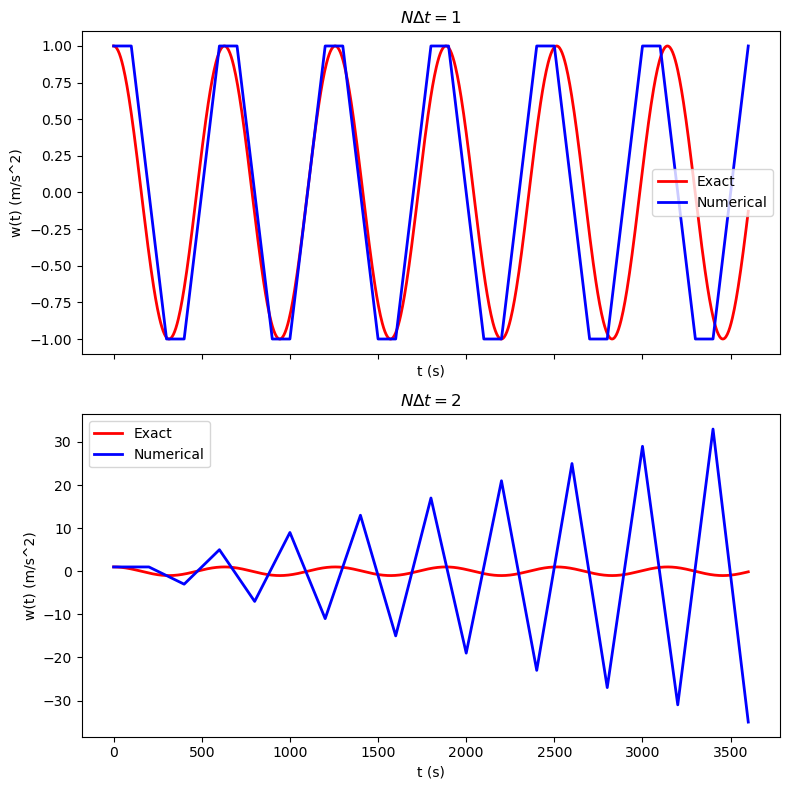

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
w0 =1  # m/s
a0 = 0  # m/s^2
N = 1e-4  # 1/s^2
t_max = 3600  # s
dt_1 = 1/N**(1/2)  # s
dt_2 = 2/N**(1/2) # s

# Define exact solution
def w_exact(t):
    return w0*np.cos(N**(1/2)*t) + (a0/N)**0.5*np.sin(N**(1/2)*t)

# Define numerical solution
def w_numerical(dt):
    # Set initial conditions
    phi0 = w0/(N**(1/2))
    phi1 = phi0 - a0*dt/(N**(1/2))
    # Iterate over time steps
    phi_list = [phi0, phi1]
    t_list = [0, dt]
    while t_list[-1] < t_max:
        phi_next = 2*phi_list[-1] - phi_list[-2] - N*dt**2*phi_list[-1]
        phi_list.append(phi_next)
        t_list.append(t_list[-1] + dt)
    # Convert phi values to w values
    w_list = [N**(1/2)*phi for phi in phi_list]
    return np.array(w_list)

# Evaluate solutions
t = np.linspace(0, t_max, 1000)
w_exact_1 = w_exact(t)
w_exact_2 = w_exact(t)
w_numerical_1 = w_numerical(dt_1)
w_numerical_2 = w_numerical(dt_2)

# Plot solutions
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 8))

#first plot
axs[0].plot(t, w_exact_1, label='Exact', color='red', linewidth=2)
axs[0].plot(np.arange(len(w_numerical_1))*dt_1, w_numerical_1, label='Numerical', color='blue', linewidth=2)
axs[0].set_title(r'$N\Delta t=1$')
#first plot
axs[1].plot(t, w_exact_2, label='Exact', color='red', linewidth=2)
axs[1].plot(np.arange(len(w_numerical_2))*dt_2, w_numerical_2, label='Numerical', color='blue', linewidth=2)
axs[1].set_title(r'$N\Delta t=2$')
#axes label
for ax in axs:
    ax.set_xlabel('t (s)')
    ax.set_ylabel('w(t) (m/s^2)')
    ax.legend()
    
plt.tight_layout()
plt.savefig('Lab3.jpg', dpi=300) #saving plot
plt.show() # Display the plot

As we can see, the numerical solution with $(N\Delta t) = 1$ matches the exact solution almost perfectly, while the solution with $(N\Delta t) = 2$ shows some oscillations and a slight phase shift. This is consistent with the result from part 2a, where we derived the condition for no amplification in time as $0 < (N\Delta t)^2 < 4$. When $(N\Delta t) = 1$, the condition is satisfied and the numerical solution is stable, hence it matches the exact solution very well. When $(N\Delta t) = 2$, the condition is not satisfied and the numerical solution exhibits some amplification and phase error over time, resulting in the oscillations and phase shift we see in the plot showing that the numerical solution is unstable.

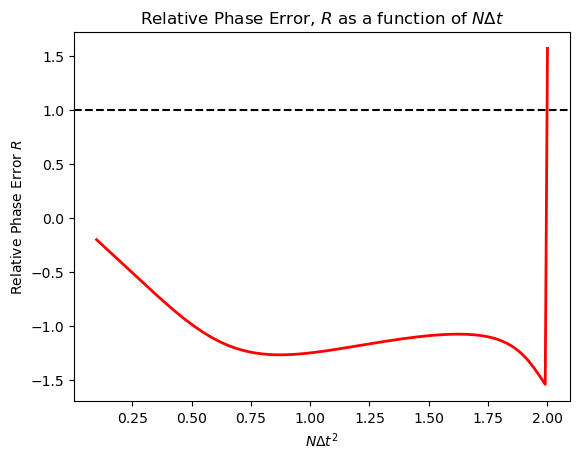

In [45]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate an array of 200 values evenly spaced between 0.01 and 2
ndt = np.linspace(0.1, 2, 200)

# Calculate the relative phase error R for each value of ndt
R = np.arctan2((ndt)**2 * ((ndt)**2 - 4), (2 - (ndt)**2 )) / (ndt)
#R = np.arctan2(np.sqrt((ndt)**2 * (4-ndt**2)),(2 - ndt**2))/ (ndt)
# Plotting
plt.plot(ndt, R, color='red', linewidth=2)
plt.xlabel('$N\Delta t^2$') # Label the x-axis
plt.ylabel('Relative Phase Error $R$') # Label the y-axis
plt.title('Relative Phase Error, $R$ as a function of $N\Delta t$') # Add a title to the plot'
plt.axhline(y=1, color='black', linestyle='--')
plt.savefig('Lab3_1.jpg', dpi=300) #saving plot

plt.show() # Display the plot


The plot in part 2b shows that in the case of $N\Delta t=1$, the numerical solution is slower than the analytical solution, and the negative value of the relative phase error in part 2c confirms this difference. The relative phase error, which represents the deviation between the numerical and analytical solutions, increases rapidly as $(N\Delta t)$ approaches 2, in line with the condition for no amplification in time that was derived in part 2a.

For the $N\Delta t = 1$ case, the error is minimal, which is why the numerical and exact solutions agree well, as shown in part 2b. The error associated with $(N\Delta t)^2 = 1$ is very small, which explains the good agreement between the numerical and exact solutions for this case.

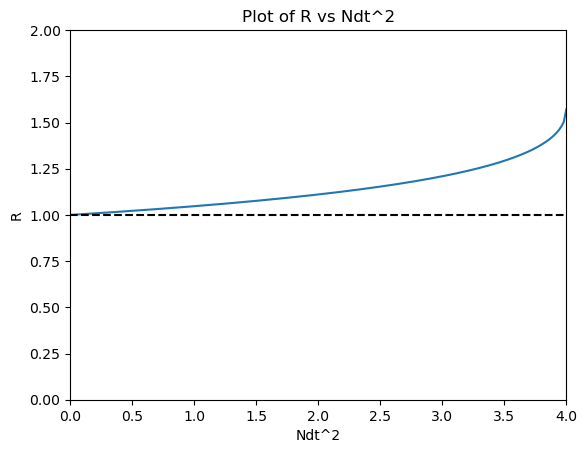

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate R
def R(Ndt):
    return np.arctan2(np.sqrt((Ndt**2)*(4-Ndt**2)), 2-Ndt**2)/(Ndt)

# Generate 200 evenly spaced points between 0.1^2 and 2^2
Ndt_squared_values = np.linspace(0.01, 4, 200)
Ndt_values = np.sqrt(Ndt_squared_values)

# Calculate R for each Ndt value
R_values = np.array([R(Ndt) for Ndt in Ndt_values])

# Plot the results
plt.plot(Ndt_squared_values, R_values)
plt.xlabel('Ndt^2')
plt.ylabel('R')
plt.title('Plot of R vs Ndt^2')
plt.ylim(0,2)
plt.xlim(0,4)
plt.axhline(y=1, color='black', linestyle='--')
plt.show()